The dataset used in this notebook is included in the folder of the project.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers_data = pd.read_csv("Mall_Customers.csv")

In [3]:
customers_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customers_data = customers_data.drop('CustomerID', axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(customers_data.iloc[:, 0])
print(encoded_sex)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [7]:
customers_data['Genre'] = encoded_sex

In [8]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
customers_data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(customers_data)
reduced_data

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878330e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [12]:
reduced_data.shape

(200, 2)

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters=5)

In [15]:
cluster = km.fit(reduced_data)

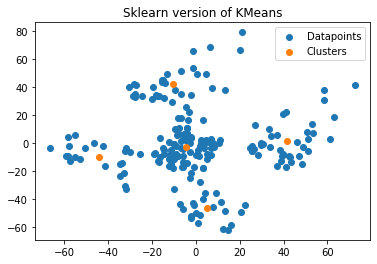

In [16]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [17]:
from kmeans_numpy_improved import *

In [18]:
km_numpy = KMeans_numpy(n_clusters=5, tolerance=0.0001)

In [19]:
clusters, clusterd_data = km_numpy.fit(reduced_data)
clusters = np.array(clusters)

In [20]:
cluster_one_data = np.array(clusterd_data[0])
cluster_two_data = np.array(clusterd_data[1])
cluster_three_data = np.array(clusterd_data[2])
cluster_four_data = np.array(clusterd_data[3])
cluster_five_data = np.array(clusterd_data[4])

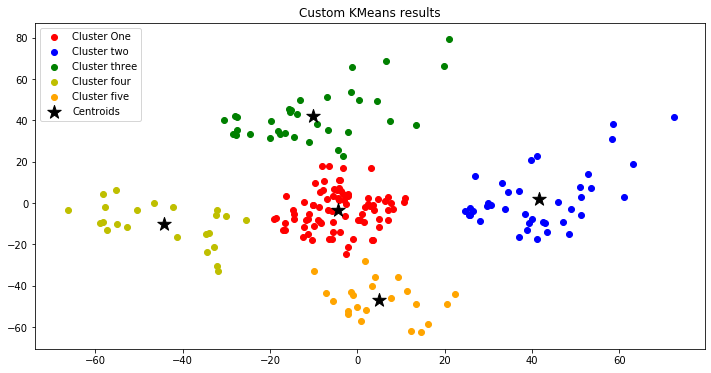

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

## Analyse clusters

In [22]:
full_data_kmeans = KMeans_numpy(n_clusters=5)
centroids, clus_data = full_data_kmeans.fit(customers_data.values)

C:\Users\Gururajan\DataScienceLevelTwo\data_modelling\clustering\k-means_centroid\clustering-python\Customer in Mall clusterng\kmeans_numpy_improved.py:60: RuntimeWarning: divide by zero encountered in true_divide
  if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:


Let's creat table for each centroid so we can easly visualise data in clusters

In [23]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_5 = pd.DataFrame(clus_data[4], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

### Cluster ONE data

In [24]:
cluster_1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,27,40,47
1,0,29,40,42
2,0,31,40,42
3,1,33,42,60
4,0,31,43,54
5,0,27,46,51
6,1,19,46,55
7,1,18,48,59
8,0,43,48,50
9,1,19,48,59


In [25]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_1['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_1.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_1.loc[(cluster_1['Genre'] == 1.0)].shape[0], cluster_1.loc[(cluster_1['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 33.39622641509434
Average annual income (in thousends) for customers in cluster one: 58.056603773584904
Deviation of the mean for annual income (in thousends) for customers in cluster one: 8.622951152526245
In cluster one we have: 53 customers
From those customers we have 19 male and 34 female


### Cluster TWO Customers analysis

In [26]:
cluster_2

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,39,69,91
1,0,31,70,77
2,1,40,71,95
3,1,38,71,75
4,1,39,71,75
5,0,31,72,71
6,0,29,73,88
7,1,32,73,73
8,0,35,74,72
9,1,32,75,93


In [27]:
print("Average age for customers in cluster two: {}".format(np.array(cluster_2['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_2.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_2.loc[(cluster_2['Genre'] == 1.0)].shape[0], cluster_2.loc[(cluster_2['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster two: 32.69230769230769
Average annual income (in thousands) for customers in cluster one: 86.53846153846153
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.10199247719673
In cluster one we have: 39 customers
From those customers we have 18 male and 21 female


### Cluster THREE Customers analysis

In [28]:
cluster_3

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,59,71,11
1,1,47,71,9
2,1,20,73,5
3,0,44,73,7
4,1,19,74,10
5,0,57,75,5
6,1,25,77,12
7,1,48,77,36
8,0,34,78,22
9,1,43,78,17


In [29]:
print("Average age for customers in cluster three: {}".format(np.array(cluster_3['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_3.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_3.loc[(cluster_3['Genre'] == 1.0)].shape[0], cluster_3.loc[(cluster_3['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster three: 41.64705882352941
Average annual income (in thousands) for customers in cluster one: 88.73529411764706
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.090385919273096
In cluster one we have: 34 customers
From those customers we have 19 male and 15 female


### Cluster FOUR Customers analysis

In [30]:
cluster_4

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,20,16,6
1,0,31,17,40
2,0,35,18,6
3,1,64,19,3
4,1,67,19,14
5,0,58,20,15
6,1,37,20,13
7,0,35,21,35
8,1,52,23,29
9,1,35,24,35


In [31]:
print("Average age for customers in cluster four: {}".format(np.array(cluster_4['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_4.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_4.loc[(cluster_4['Genre'] == 1.0)].shape[0], cluster_4.loc[(cluster_4['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster four: 54.06
Average annual income (in thousands) for customers in cluster one: 40.46
Deviation of the mean for annual income (in thousands) for customers in cluster one: 14.242485738100637
In cluster one we have: 50 customers
From those customers we have 22 male and 28 female


### Cluster FIVE Customers analysis

In [32]:
cluster_5

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,39,69,91
1,0,31,70,77
2,1,40,71,95
3,1,38,71,75
4,1,39,71,75
5,0,31,72,71
6,0,29,73,88
7,1,32,73,73
8,0,35,74,72
9,1,32,75,93


In [33]:
print("Average age for customers in cluster five: {}".format(np.array(cluster_5['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_5.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_5.loc[(cluster_5['Genre'] == 1.0)].shape[0], cluster_5.loc[(cluster_5['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster five: 32.69230769230769
Average annual income (in thousands) for customers in cluster one: 86.53846153846153
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.10199247719673
In cluster one we have: 39 customers
From those customers we have 18 male and 21 female


### Conclusion:

Based on the data from clusters we can see that there are 3 clusters with totally different age of customers. Also it is more usual for older people to have bigger sallary which is as well shown in our results.

As we can see in the cluster 2, people around age 40 have the biggest salary. Based on that the most exclusive items should be directly promoted to people in that age. Younger people, around the age of 25, tend to have lower salaries, but as we can see from Cluster 5 there are people around age 28 whose salary is much bigger (almost double). 

Gender to target in this mall is of course: Females. They tend to buy more stuff, so promotions should be directed to them.


## Business side of Customer clustering

So the real question is how can we use this in our business? Based on the information from the clusters we can decide which strategy to run, what our target should be. There is also a posibility  to conduct a survey on the potential new strategy for one or two segments of customers. Based on that feedback we can decide whether the new strategy is good for that customer segment or not, even before the strategy is released.